
## Описание проекта и цели исследования

Исследование посвящено анализу рынка общественнго питания города Москва. Цель исследования- для открытия нового заведения найти закономерности и сделать  рекомендации  о виде заведения, количестве посадочных мест, а также районе расположения. Инвесторов интересует текущее положение дел на рынке. У нас есть открытые данные о заведениях общественного питания в Москве.

В ходе исследования изучим соотношение видов объектов общественного питания по количеству, соотношение сетевых и несетевых заведений. Построим графики. Определим что характерно для сетевых заведений. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Построим графики.

Поработаем с расположением. Построим график топ-10 улиц по количеству объектов общественного питания, также найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы? Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 

Сделаем общие выводы и подготовим презентацию для инвесторов.

[Презентация](https://drive.google.com/file/d/179kk_JCBqtOjhkm1iZku-e43fz57J-g9/view?usp=sharing)

## Загрузка и предобработка данных

In [73]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
from IPython.display import display
from io import BytesIO
import requests 
spreedsheet_id = '1FIdyerMaOqimH-H7fM1e-tyaKPJ4yvwP'

In [74]:
# загружаем данные
rest_data = pd.read_csv('*')

In [75]:
# Посмотрим общую информацию о данных через собственную функцию "hello_data".


def hello_data(data):
    columns = data.columns 
    display(data.head(15))
    display(data.info())
    print( f'Явных дубликатов в данных: {data.duplicated().sum()}')
           
    for column in columns: # для каждой колонки
        #try:
          #  unique_value = data[column].nunique() # считаем уникальные значения 
       # except AssertionError:
        #    pass
        
        if data[column].isna().sum() != 0: # если в колонке есть пропуски
           # print( f'Уникальных значений в колонке {column} - {unique_value}') #выводим количество уникальных значений
            persent = round((data[column].isna().sum() / len(data[column]) * 100), 2) # считаем сколько это в процентах и округляем методом "round"
            print('Пропущенных строк в колонке {0} - {1} %'.format(column, persent))
            print("___________")
      #  else: print( f'Уникальных значений в колонке {column} - {unique_value}') # если пропусков не нашли, то выводим количество уникальных значений  
    display(data.nunique()\
        .sort_values()\
        .reset_index()\
        .rename(columns={'index':'column',0:'unique_values'}))
    
hello_data(rest_data)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

Явных дубликатов в данных: 0


,column,unique_values
0,chain,2
1,object_type,9
2,number,315
3,address,9108
4,object_name,10393
5,id,15366


В имеющемся датасете rest_data есть следующие столбцы:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

Датасет корректно выгружен. Ошибок в данных нет, типы данных правильные. Но имеются неодназначные названия объектов общественного питания. Например "Буфет МТУСИ" и "Столовая МТУСИ" с одинаковым адресом расположения. Сложно сказать это неявные дубликаты или действительно два разных заведения в одном здании? Кроме того оба заведения в колонке "object_type" имеют статус столовая. Но имеем то, что имеем. Сомнения вызывает и разный регистр в названиях заведений и адресах - это тоже может привести к неявным дубликатам. Стоит привести все названия к нижнему регистру для удобства последующей группировки.  Колонка "chain" содержит всего два значения: да и нет. Заменим их на булевы значения. В типах заведений есть очень длинные названия, которые ухудшают воприятие графиков. Заменим оригинальные названия 'предприятие быстрого обслуживания' и 'магазин \(отдел кулинарии\)' на 'фаст-фуд' и 'кулинария' соответственно.

In [76]:
rest_data['chain'] = rest_data['chain'].replace({'да': True, 'нет': False})
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()
rest_data['address'] = rest_data['address'].str.strip()

dict_name = {'предприятие быстрого обслуживания':'фаст-фуд', 'магазин (отдел кулинарии)' :'кулинария'}
rest_data["object_type"]= rest_data["object_type"].map(dict_name).fillna(rest_data["object_type"])
        
# проверяем
display(rest_data['object_type'].unique())
rest_data.head()

array(['кафе', 'столовая', 'закусочная', 'фаст-фуд', 'ресторан',
       'кафетерий', 'буфет', 'бар', 'кулинария'], dtype=object)

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


### Вывод

Данные выгружены и проверены. Технических проблем не обнаружено, но выполнена корректировка имеющихся данных для последующей обработки. Названия заведений  и адреса приведены к нижнему регистру для уменьшения количества неявных дубликатов. Тип данных в колонке "chain" заменен на bool. Переименовали длинные названия в типах заведений. Оригинальные названия 'предприятие быстрого обслуживания' и 'магазин \(отдел кулинарии\)' заменили на 'кулинария' на 'фаст-фуд' и 'кулинария'.

## Исследовательский анализ данных

В нашем датасете более 15 тысяч объектов: кафе, столовые, буфеты, рестораны и пр. Определим для начала какие виды общепита имеются в Москве и посмотрим какое у них соотношение между собой. 

Далее разделим заведения по принципу сетевое / несетевое, посмотрим соотношение. Найдем для какого вида объекта общественного питания характерно сетевое распространение. Для каждого вида объектов общественного питания опишем среднее количество посадочных мест и найдем у какого вида в среднем самое большое количество посадочных мест. Построим графики.

И поработаем с местоположением заведений. Построим график топ-10 улиц по количеству объектов общественного питания. Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы? Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности.

### Соотношение видов объектов общественного питания

Сгруппируем объекты по типу и посчитаем процентное соотношение:

In [77]:
# группируем по типу 
object_types = rest_data.groupby('object_type', as_index=False)\
                        .agg({'object_name':'count'})\
                        .sort_values(by='object_name', ascending=False)
# считаем процентное соотношение
object_types['percent'] = (object_types['object_name']/object_types['object_name'].sum()*100)\
                        .round(2)\
                        .astype('str') + '%'

In [78]:
# строим график соотношения видов объектов 
fig = px.bar(object_types, 
             y='object_name', 
             x='object_type', 
             text='percent', 
             template = 'simple_white', 
             color='object_type')

#fig.update_xaxes(tickangle=15)

fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")

fig.update_traces(textposition='outside',
                showlegend = False,
                 hovertemplate ='Вид: %{x} <br> Количество: %{y}')

fig.show()

Самый распространенный вид - это кафе 39,69%. Вообще пользуются популярностью заведения, где можно с комфортом и полноценно покушать - кафе, столовые и рестораны, предприятия быстрого обслуживания. Гораздо меньше заведений с узкой направленностью - бары, буфеты, кафетерии, их от 2 до 6%.

### Соотношение сетевых и несетевых заведений

In [79]:
# строим график 
fig = go.Figure(go.Pie(
    labels=['Несетевые', 'Сетевые'],
    values = rest_data['chain'].value_counts().to_list(), 
    title='Cоотношение сетевых и несетевых заведений по всем улицам Москвы'))

fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0,0.3])
fig.show()

Несетевые заведения преобладают- их почти 81%. Так что цель открыть новое кафе, не входящее в сеть, пока кажется весьма перспективной. Однако неплохо бы взглянуть на сетевые заведения повнимательней. Это устоявшийся бизнес со своей успешной концепцией работы и развития сети. 

### Самые популярные виды сетевых заведений

Определим в каком формате сети предпочитают вести бизнес. Соотносится ли это с рынком в целом?

In [80]:
#срез сетевых
chain_object = (rest_data[rest_data['chain'] == True].loc[:,:]).copy()

# группируем сетевые
group_chain_object = chain_object.groupby('object_type', as_index=False)\
                        .agg({'object_name':'count'})\
                        .sort_values(by='object_name', ascending=False)
# считаем %
group_chain_object['percent'] = (
    group_chain_object['object_name']/group_chain_object['object_name'].sum()*100).round(2).astype('str') + '%'

group_chain_object

,object_type,object_name,percent
3,кафе,1396,47.04%
8,фаст-фуд,791,26.65%
6,ресторан,544,18.33%
5,кулинария,78,2.63%
2,закусочная,56,1.89%
4,кафетерий,52,1.75%
0,бар,37,1.25%
1,буфет,11,0.37%
7,столовая,3,0.1%


In [81]:
# строим график 
fig = px.bar(group_chain_object, 
             y='object_name', 
             x='object_type', 
             text='percent', 
             template = 'simple_white', 
             color='object_type')

#fig.update_xaxes(tickangle=15)
fig.update_layout(
    title='Соотношение видов сетевых объектов',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")

fig.update_traces(textposition='outside',
                showlegend = False,
                 hovertemplate ='Вид: %{x} <br> Количество: %{y}')

fig.show()

Да, кафе самый популярный формат и для сетевых заведений. Здесь процент даже выше - 47%. Дальше приоритет немного отличается. На втором месте заведения быстрого обслуживания - 26,65%, на третьем рестораны - 18,33%.  А вот сетевых столовых практически нет- 0,1%.
Теперь посмотрим соотношение стевых заведенийк рынку в целом. Соберем сводную таблицу и построим график.

In [82]:
data_chain_split = rest_data.pivot_table(index='object_type', columns='chain', aggfunc='count')\
                                         [[('address', False), ('address', True)]].reset_index()
data_chain_split.columns = ['object_type', 'chain_false', 'chain_true']

,object_type,chain_false,chain_true
3,кафе,4703,1396
8,фаст-фуд,1132,791
6,ресторан,1741,544
5,кулинария,195,78
2,закусочная,304,56
4,кафетерий,346,52
0,бар,819,37
1,буфет,574,11
7,столовая,2584,3


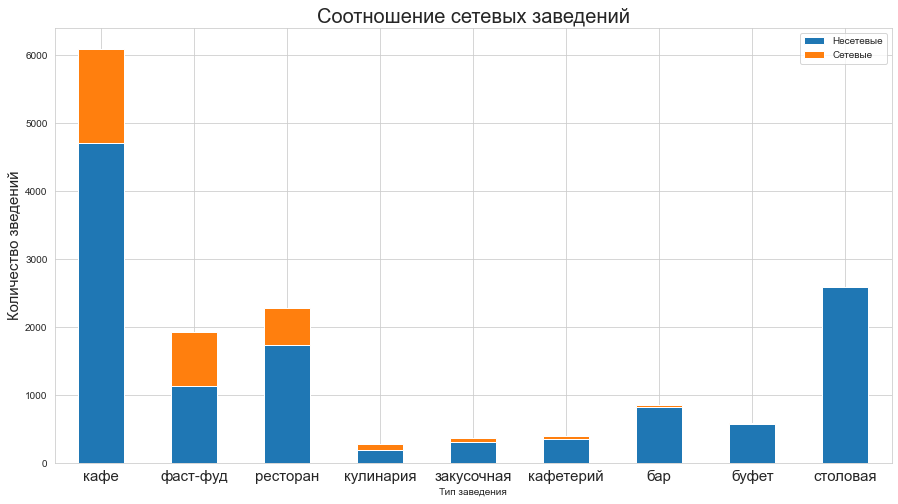

In [83]:
data_chain_split = data_chain_split.sort_values(by='chain_true', ascending= False)
data_chain_split.plot(kind='bar', x= 'object_type', stacked=True, figsize=(15, 8))
plt.title("Соотношение сетевых заведений",fontsize=20)
plt.legend(labels=['Несетевые', 'Сетевые'])
plt.xlabel("Тип заведения",fontsize=10)
plt.ylabel("Количество зведений",fontsize=15)
plt.xticks(rotation=0,fontsize=15)
data_chain_split.sort_values(by='chain_true', ascending= False)

Вывод: В целом по рынку сетевые заведения имеют самую большую долю среди кафе, фаст-фудах и ресторанах. Очень немного их среди баров, кулинарий кафетериев и закусочных. Буфетов и столовых настолько мало, что они даже не попали на график.

### Особенности сетевых заведений

Найдем что характерно для сетей: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Определимся, для начала, какое количество посадочных мест считать большим, а какое маленьким. Применим  np.percentile и разделим количество посадочных мест по всем сетевым заведениям на категории одинакового размера.

In [84]:
[np.percentile(chain_object['number'], i) for i in [25, 50, 75]]

[15.0, 40.0, 72.0]

Получили 4 равных группы по количеству посадочных мест: 
- маленькое заведение до 15 мест,
- небольшое заведение от 16 до 40,
- среднее заведение от 41 до 72,
- большое заведение от 73 и больше

Напишем функцию для категоризации заведений и дополним нашу таблицу сетвых заведений.

In [85]:
# функция для деления по количеству посадочных мест
def number_category(row):
    if row['number'] <= 15:
        return "маленькое заведение"
    elif 16 < row['number'] <= 40:
        return "небольшое заведение"
    elif 41 < row['number'] <= 72:
        return "среднее заведение"
    else:
        return "большое заведение"

In [86]:
# добавляем столбец в таблицу сетевых 
chain_object['number_category'] = chain_object.apply(number_category, axis=1) 
chain_object.head()

,id,object_name,chain,object_type,address,number,number_category
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,небольшое заведение
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,маленькое заведение
13,22579,алло пицца,True,кафе,"город москва, улица авиаторов, дом 14",32,небольшое заведение
16,144107,суши wok,True,фаст-фуд,"город москва, азовская улица, дом 3",7,маленькое заведение
18,58565,тануки,True,ресторан,"город москва, большая академическая улица, дом 65",160,большое заведение


А теперь определимся какую сеть считать крупной, а какую маленькой. Сгруппируем заведения по названиям сети и найдем границы разделения. 25 перцентиль примем за нижнюю границу и все сети с меньшим количеством заведений отнесем к категории маленьких, крупными признаем сети с количеством заведений выше 75 перцентиля.

In [87]:
# группируем по названию сети
group_name_chain_object = chain_object.groupby('object_name', as_index=False)\
                        .agg({'id':'count'})

group_name_chain_object.columns = ['object_name', 'count_object']

При первой попытке расчитать перцентили наткнулись на большое количество единичных названий сети,чего быть не должно. Возможно это сети, имеющие заведения не только в Москве, а возможно - это неявные дубликаты, возникшие при занесении данных в базу. Так как мы изучаем только Москву, то было принято решение исключить единичные заведения из подсчетов.

In [88]:
group_name_chain_object = group_name_chain_object.query("count_object> 1") # убираем единичные заведения

[np.percentile(group_name_chain_object['count_object'], i) for i in [25, 50, 75]]


[2.0, 4.0, 7.0]

25 % сетей состоят из 2 заведений, часть из них также может являться неявными дубликатами, но адекватного способа почистить такие дубликаты нет. Оставим как есть и примем за нижнюю границу. Медианное значение 4 заведения в сети. Крупными сетями будем считать более 7 заведений.

In [89]:
def chain_size_category(row):
    if row['chain_size'] <= 2:
        return 'маленькая сеть'
    elif 2 < row['chain_size'] <= 7:
        return 'средняя сеть'
    return 'крупная сеть'
# считаем количество заведений в сети и заносим в таблицу отдельной колонкой для каждого заведения
chain_object['chain_size'] = chain_object["object_name"].map(chain_object.groupby("object_name")["id"].count())
# делим на группы по количеству заведений в сети
chain_object['chain_size_category'] = chain_object.apply(chain_size_category, axis=1) 
chain_object.head()

,id,object_name,chain,object_type,address,number,number_category,chain_size,chain_size_category
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,небольшое заведение,2,маленькая сеть
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,маленькое заведение,8,крупная сеть
13,22579,алло пицца,True,кафе,"город москва, улица авиаторов, дом 14",32,небольшое заведение,15,крупная сеть
16,144107,суши wok,True,фаст-фуд,"город москва, азовская улица, дом 3",7,маленькое заведение,72,крупная сеть
18,58565,тануки,True,ресторан,"город москва, большая академическая улица, дом 65",160,большое заведение,32,крупная сеть


In [90]:
# группируем сети по количеству заведений и количеству посадочных мест, сортируем по количеству заведений
chain_size = pd.pivot_table (chain_object, index = ['chain_size_category', 'number_category'], values = ['id'], aggfunc = 'count')\
  .sort_values(by = 'id', ascending= False)
chain_size

id
chain_size_category number_category         
крупная сеть        маленькое заведение  587
                    небольшое заведение  522
                    большое заведение    471
                    среднее заведение    429
средняя сеть        большое заведение    167
маленькая сеть      большое заведение    149
                    небольшое заведение  128
средняя сеть        небольшое заведение  110
маленькая сеть      маленькое заведение  107
средняя сеть        среднее заведение    103
маленькая сеть      среднее заведение    101
средняя сеть        маленькое заведение   94

Чаще всего встречаются заведения крупных сетей, в которых более 7 точек, и с маленьким количеством посадочных мест - не более 15 мест. На втором месте крупные сети с небольшим количеством посадочных мест - от 16 до 40 мест.

Реже всего сети среднего размера, в которых от 2 до 7 заведений с небольшим количеством посадочных мест - от 16 до 40 мест.

### Среднее количество посадочных мест по виду заведений

Найдем для каждого вида объекта общественного питания среднее количество посадочных мест.

In [91]:
# группируем по типам заведений, считаем среднее для каждой
mean_number = rest_data.groupby('object_type')\
                       .agg({'number':'mean'})\
                       .reset_index().round()\
                       .sort_values(by='number', ascending=False)
# строим график
fig = px.bar(mean_number, 
             y='number', 
             x='object_type', 
             text=mean_number['number'], 
             template = 'simple_white', 
             color='object_type')


fig.update_layout(
    title='Среднее количество посадочных мест по виду заведений',
    xaxis_title="Тип объекта",
    yaxis_title="Количество посадочных мест")

fig.update_traces(textposition='outside',
                showlegend = False,
                 hovertemplate ='Вид: %{x} <br> Количество: %{y}')
fig.show()

В среднем самыми крупными заведениями являются столовые, они обычно расчитаны на 130 мест. Много и крупных ресторанов - 97 мест. В интересующем нас виде - кафе среднее количество мест - 40. 

### Локация заведений.  Топ-10 улиц по количеству объектов

Чтобы опрделить самые популярные улицы выделим сначала в отдельный столбец информацию об улице из столбца address.

In [92]:
# делим адрес на элементы и записываем их в отдельный датафрейм
splited_adress = rest_data["address"].str.split(',', expand=True)
rest_data['street'] = splited_adress[1] # берем значения из 2 колонки
rest_data['street'] = rest_data['street'].str.strip()# чистим от пробелов
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


In [93]:
# группируем по названию улиц
top_10_street = rest_data.groupby(['street'])\
                        .agg({'id':'count'})\
                        .sort_values(by='id',ascending=False)\
                        .head(12).reset_index()
# убираем данные не относящиеся к Москве
top_10_street = top_10_street.query('street != "город зеленоград" and street != "поселение сосенское"')
top_10_street

,street,id
1,проспект мира,204
2,профсоюзная улица,182
3,ленинградский проспект,171
4,пресненская набережная,167
5,варшавское шоссе,161
6,ленинский проспект,147
8,проспект вернадского,132
9,кутузовский проспект,114
10,каширское шоссе,112
11,кировоградская улица,110


In [94]:
fig = go.Figure(data=[go.Bar(x = top_10_street['street'],
                             y = top_10_street['id'],
                             text= top_10_street['id'],
                             textposition = 'outside',                            
                             )])

fig = px.bar(top_10_street, 
             y='id', 
             x='street', 
             text='id', 
             template = 'simple_white', 
             color='street')

fig.update_layout(title_text='Топ- 10 улиц с самым большим количеством заведений общепита',
                  xaxis_title="Улица",
                  yaxis_title="Количество объектов")
fig.update_traces(textposition='outside',
                showlegend = False,
                 hovertemplate ='%{x} <br> Заведений: %{y}')
fig.show()

Больше всего заведений на проспекте Мира - 204 объекта. В конце десятки  Кировская улица -110 объектов.

Воспользуемся открытыми данными Мосгаза и определим к каким районам относятся улицы. Файл более не доступен на сайте, используем его локально.

In [95]:
spreedsheet_id = '1v5UcgmhhlypRT1FkONvy_YCM3e0VmLFp-ooKwZmS_k4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreedsheet_id)
r = requests.get(file_name)
streets_from_mosgaz = pd.read_csv(BytesIO(r.content))
streets_from_mosgaz.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [96]:
# понижаем регистр в названиях улиц  и переименовываем столбец
streets_from_mosgaz['streetname'] = streets_from_mosgaz['streetname'].str.lower()
streets_from_mosgaz['streetname'] = streets_from_mosgaz['streetname'].str. lstrip()
streets_from_mosgaz = streets_from_mosgaz.rename(columns={'streetname':'street'})
streets_from_mosgaz.head()

,street,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [98]:
# собираем топ-10 и данные Мосгаза в одну таблицу и сортируем по количеству заведений
street_area = top_10_street.merge(streets_from_mosgaz, on='street', how='left').drop(columns='areaid')
street_area.pivot_table(index=['street', 'area','okrug']).sort_values(by='id', ascending=False)

id
street                 area                            okrug     
проспект мира          Район Ростокино                 СВАО   204
                       Ярославский Район               СВАО   204
                       Алексеевский район              СВАО   204
                       Мещанский район                 ЦАО    204
                       Останкинский район              СВАО   204
                       Район Марьина роща              СВАО   204
                       Район Свиблово                  СВАО   204
профсоюзная улица      Район Ясенево                   ЮЗАО   182
                       Академический район             ЮЗАО   182
                       Обручевский район               ЮЗАО   182
                       Район Коньково                  ЮЗАО   182
                       Район Теплый Стан               ЮЗАО   182
                       Район Черемушки                 ЮЗАО   182
ленинградский проспект Район Сокол                     САО    171
                       Хорошевский район               САО    171
                       Район Аэропорт                  САО    171
                       Район Беговой                   САО    171
пресненская набережная Пресненский район               ЦАО    167
варшавское шоссе       Нагорный район                  ЮАО    161
                       Донской район                   ЮАО    161
                       Район Нагатино-Садовники        ЮАО    161
                       Район Северное Бутово           ЮЗАО   161
                       Район Чертаново Северное        ЮАО    161
                       Район Чертаново Центральное     ЮАО    161
                       Район Чертаново Южное           ЮАО    161
                       Район Южное Бутово              ЮЗАО   161
ленинский проспект     Район Гагаринский               ЮЗАО   147
                       Донской район                   ЮАО    147
                       Ломоносовский район             ЮЗАО   147
                       Обручевский район               ЮЗАО   147
                       Район Проспект Вернадского      ЗАО    147
                       Район Теплый Стан               ЮЗАО   147
                       Район Тропарево-Никулино        ЗАО    147
                       Район Якиманка                  ЦАО    147
проспект вернадского   Район Тропарево-Никулино        ЗАО    132
                       Район Раменки                   ЗАО    132
                       Район Проспект Вернадского      ЗАО    132
                       Район Гагаринский               ЮЗАО   132
                       Ломоносовский район             ЮЗАО   132
кутузовский проспект   Район Дорогомилово              ЗАО    114
                       Район Фили-Давыдково            ЗАО    114
каширское шоссе        Район Орехово-Борисово Южное    ЮАО    112
                       Район Орехово-Борисово Северное ЮАО    112
                       Район Нагатино-Садовники        ЮАО    112
                       Район Москворечье-Сабурово      ЮАО    112
кировоградская улица   Район Чертаново Центральное     ЮАО    110
                       Район Чертаново Северное        ЮАО    110
                       Район Чертаново Южное           ЮАО    110

Улицы могут пролегать через несколько районов и даже округов. К примеру, проспект Мира- лидер по количеству объектов общепита, проходит через районы Ростокино, Ярославский, Алексеевский, Останкинский, Марьина роща и Свиблово. Все они находятся в Северо-Восточном административном округе, проспект Мира захватывает и Мещанский район Центрального административного округа. В любом случае это самые крупные улицы города. При выборе места для открытия нового заведения нужно ориентироваться на них.

Теперь пересортируем таблицу и посмотрим сколько улиц из топ-10 может быть в одном районе.

In [99]:
# группируем по названию улиц
winner = street_area.groupby(['area'])\
                        .agg({'street':'count'})\
                        .sort_values(by='street',ascending=False)\
                        .reset_index()

Через один район пролегает не более 2 улиц из топ-10. Вот список районов:
- Район Чертаново Центральное
- Донской район
- Ломоносовский район
- Район Проспект Вернадского
- Обручевский район	
- Район Теплый Стан	
- Район Нагатино-Садовники	
- Район Чертаново Южное	
- Район Тропарево-Никулино	
- Район Гагаринский	
- Район Чертаново Северное	

In [104]:
fig = px.bar(winner, x='street', y='area',
             color='street',
             template = 'simple_white')

fig.update_layout(title_text='Районы с улицами из топ-10',
                  xaxis_title="Количество популярных улиц в районе ",
                  yaxis_title="Районы")
fig.update_traces(textposition='outside',
                showlegend = False,
                 hovertemplate ='%{y} <br> Количество улиц: %{x}')
fig.show()

### Локация заведений. Непопулярные места
Теперь найдем число улиц с одним объектом общественного питания и посмотрим в каких районах Москвы находятся эти улицы

In [105]:
# группируем 
street_one_object = rest_data.groupby('street').agg({'object_name': 'count'})
# делаем срез с 1 объектом, чистим индексы
street_one_object = street_one_object.query('object_name == 1')
street_one_object = street_one_object.reset_index()
street_one_object['street'].count()

579

Получили 579 улиц на которых есть только одно заведение общественного питания. Теперь добавим к улицам районы расположения и посмотрим в каком районе находятся эти улицы.

In [106]:
area_one_object = street_one_object.merge(streets_from_mosgaz[['street', 'area']], on='street', how='left')
loser = area_one_object.groupby('area')\
               .agg({'street':'count'})\
               .sort_values(by= 'street', ascending = False).reset_index()

99 районов. Можно сказать, что весь город. Таганский, Хамовники и Басманный районы имеют большинство улиц с одним объектом общепита. Это практически центр города. Скорее всего здесь речь идет о мелких переулках и коротких улицах, которых очень много в старинных городах. Последними в списке числяться Обручевский и Метрогородок	-эти районы расположены между третьим транспортным кольцом и МКАДом вдали от центра города.

In [107]:
fig = px.bar(loser, x='street', y='area',
             color='street',
             template = 'simple_white')

fig.update_layout(title_text='Непопулярные места',
                  xaxis_title="количество улиц с одним объектом",
                  yaxis_title="Районы")
fig.update_traces(textposition='outside',
               # showlegend = False,
                 hovertemplate ='%{y} <br> Количество улиц с одним объектом: %{x}')
fig.show()

### Размеры заведений расположеных в Топ-10 улиц

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Поищем закономерности.

In [108]:
# отбираем заведения с адресом из топ-10 улиц
top_10_to_list = top_10_street['street'].to_list()
rest_data_from_top_10= rest_data.query('street in @top_10_to_list')
rest_data_from_top_10.head()

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,True,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,23618,кафе «subway»,True,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,155852,кафе «ламаджо»,False,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,152556,шаурма в пите,False,фаст-фуд,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,120658,выпечка,False,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе


C:\Users\Jane\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Количество заведений')

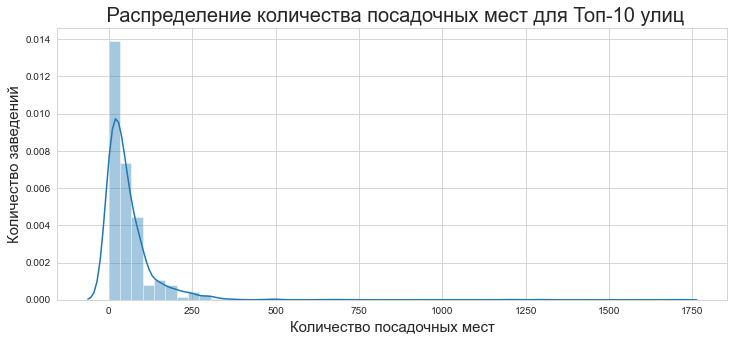

In [109]:
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")  
sns.distplot(rest_data_from_top_10['number'], bins=50)
plt.title(" Распределение количества посадочных мест для Топ-10 улиц", fontsize = 20)
plt.xlabel("Количество посадочных мест", fontsize = 15)
plt.ylabel("Количество заведений", fontsize = 15)

Видим большое количество заведений без посадочных мест. Такие заведения скорее всего работают только на вынос. Видим также длиннющий хвост из очень крупных значений. Посчитаем перцентили и отбросим заведения с нулевым количеством посадочных мест и тех, которых менее 1 процента. Перестроим график.

In [110]:
# определяем 99% посадочных мест
[np.percentile(rest_data_from_top_10['number'], i) for i in [99]]

[300.0]

C:\Users\Jane\anaconda3\envs\practicum\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



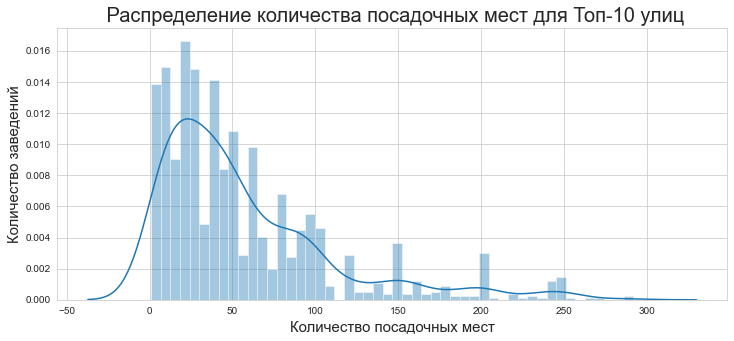

In [111]:
rest_data_from_top_10_clean = rest_data_from_top_10.query("number> 0 and number <300") 
plt.figure(figsize=(12, 5))
sns.distplot(rest_data_from_top_10_clean['number'], bins=50)
plt.title(" Распределение количества посадочных мест для Топ-10 улиц", fontsize = 20)
plt.xlabel("Количество посадочных мест", fontsize = 15)
plt.ylabel("Количество заведений", fontsize = 15)

plt.show()

In [37]:
rest_data_from_top_10_clean['number'].describe()

count    1312.000000
mean       57.188262
std        53.537162
min         1.000000
25%        20.000000
50%        40.000000
75%        80.000000
max       292.000000
Name: number, dtype: float64

In [112]:
round(rest_data_from_top_10_clean['number'],-1).mode()

0    20
Name: number, dtype: int64

График имеет сильные перепады. Лучше все же ориентироваться не на среднее 57 мест, а на медианное значение - 40 мест. Пик же приходится на 20 посадочныхз мест.Теперь посмотрим как меняется медианное значение для каждой улицы из топ-10.

In [113]:
fig = px.box(rest_data_from_top_10_clean, 
             x="street", 
             y="number", 
             points="all", 
             color='street'
            )
fig.update_xaxes(tickangle=15)

fig.update_layout(
    title='Соотношение посадочных мест для топ-10 улиц',
    xaxis_title="Улица",
    yaxis_title="Количество посадочных мест")

fig.update_traces(showlegend = False,
                 hovertemplate ='Улица: %{x} <br> Количество мест: %{y}')

fig.show()

Для проспекта Мира, на котором находится больше всего заведений общепита, медианное значение - 50 посадочных мест. На Профсоюзной улице (2е место по количеству заведений) медиана - 40 мест. Ленинградский проспект (3е место по количеству заведений) медиана -50 мест. А вот для пресненской набережной 50 мест это потолок, медиана же всего 30 мест. В общем стоит ориентироваться на 40-50 мест.

В топ-10 улиц оказалось очень много заведений без посадочных мест. Такие зведения работают на вынос или на доставку. Есть предположение, что причина в дорогой аренде недвижимости в центре города. Снимать большие площади не выгодно. 



## Вывод

В ходе исследования были изучены открытые данные о заведениях общественного питания Москвы. В датасете имеется более 15 тысяч объектов: кафе, столовые, буфеты, рестораны и пр. Соотношение сетевых и не сетевых 20 к 80%. Самый распространенный вид - это кафе 39,69%. Вообще пользуются популярностью заведения, где можно с комфортом и полноценно покушать - кафе, столовые и рестораны, предприятия быстрого обслуживания. Гораздо меньше заведений с узкой направленностью - бары, буфеты, кафетерии, их от 2 до 6%. Для сетевых заведений кафе также самый популярный вид. Здесь процент даже выше - 47%. Дальше приоритет немного отличается. На втором месте заведения быстрого обслуживания - 26,65%, на третьем рестораны - 18,33%. В целом по рынку сетевые заведения имеют самую большую долю среди кафе, фаст-фудах и ресторанах. Очень немного их среди баров, кулинарий кафетериев и закусочных. Буфетов и столовых настолько мало, что они даже не попали на график.

Среди сетевых чаще всего встречаются заведения крупных сетей, в которых более 7 точек, и с маленьким количеством посадочных мест - не более 15 мест. На втором месте крупные сети с небольшим количеством посадочных мест - от 16 до 40 мест. Реже всего сети среднего размера, в которых от 2 до 7 заведений с небольшим количеством посадочных мест - от 16 до 40 мест.

В среднем самыми крупными по вместимости заведениями среди всех являются столовые, они обычно расчитаны на 130 мест. Много и крупных ресторанов - 97 мест. В интересующем нас виде - кафе среднее количество мест - 40.

Больше всего заведений на проспекте Мира - 204 объекта. В конце десятки  Кировская улица -110 объектов. Эти улицы пролегают через несколько районов и даже округов и являются самыми крупные улицами города. При выборе места для открытия нового заведения нужно ориентироваться на непосредственную близость расположения к этим улицам.

Для проспекта Мира, на котором находится больше всего заведений общепита, медианное значение - 50 посадочных мест. На Профсоюзной улице (2е место по количеству заведений) медиана - 40 мест. Ленинградский проспект (3е место по количеству заведений) медиана -50 мест. А вот для пресненской набережной 50 мест это потолок, медиана же всего 30 мест.

Основываясь на полученных данных можно рекомендовать открыть кафе в близи крупных улиц города, таких как проспект Мира,с количеством посадочных мест 40-50.

[Ссылка на презентацию:](https://drive.google.com/file/d/179kk_JCBqtOjhkm1iZku-e43fz57J-g9/view?usp=sharing)